## Homework - 4 (Evaluation)

# 🧩 DATA PREPARATION
# -------------------------------------------------------------
1️⃣ Check if there are missing values in the features.

2️⃣ If missing values exist:
     • For categorical features → replace with 'NA'
     • For numerical features   → replace with 0.0

3️⃣ Split the dataset into three parts:
     • Train → 60%
     • Validation → 20%
     • Test → 20%

 Use the train_test_split() function with random_state=1

In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not.
# -------------------------------------------------------------


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer 
from sklearn import linear_model
from sklearn import metrics

In [3]:
# url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv"
# data = pd.read_csv(url)
data = pd.read_csv('data/course_lead_scoring.csv')
display(data.head(3))
print('\n')
display(data.tail(3))


,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1


,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NaN,5,71016.0,self_employed,north_america,0,0.25,1
1461,organic_search,finance,3,92855.0,student,north_america,3,0.41,1


In [4]:
display(data.head().T)

,0,1,2,3,4
lead_source,paid_ads,social_media,events,paid_ads,referral
industry,NaN,retail,healthcare,retail,education
number_of_courses_viewed,1,1,5,2,3
annual_income,79450.0,46992.0,78796.0,83843.0,85012.0
employment_status,unemployed,employed,unemployed,NaN,self_employed
location,south_america,south_america,australia,australia,europe
interaction_count,4,1,3,1,3
lead_score,0.94,0.8,0.69,0.87,0.62
converted,1,0,1,0,1


- Number of missing values

In [5]:
data.isnull().sum().sort_values(ascending=False)

annual_income               181
industry                    134
lead_source                 128
employment_status           100
location                     63
number_of_courses_viewed      0
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

- Descriptive stats

In [6]:
data.describe(include='object')

,lead_source,industry,employment_status,location
count,1334,1328,1362,1399
unique,5,7,4,7
top,organic_search,retail,self_employed,north_america
freq,282,203,352,225


In [7]:
data.describe(include='number').round(3)

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
count,1462.000,1281.000,1462.000,1462.000,1462.000
mean,2.031,59886.273,2.977,0.506,0.619
std,1.450,15070.140,1.682,0.288,0.486
min,0.000,13929.000,0.000,0.000,0.000
25%,1.000,49698.000,2.000,0.262,0.000
50%,2.000,60148.000,3.000,0.510,1.000
75%,3.000,69639.000,4.000,0.750,1.000
max,9.000,109899.000,11.000,1.000,1.000


- Check data types

In [8]:
data.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [9]:
categor_feature = list(data.dtypes[data.dtypes=='object'].index)
numer_feature = list(data.dtypes[data.dtypes!='object'].index)
display(categor_feature, numer_feature)

['lead_source', 'industry', 'employment_status', 'location']

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score',
 'converted']

- Fill missing observations

In [10]:
data[categor_feature] = data[categor_feature].fillna('NA')
data[numer_feature] = data[numer_feature].fillna(0)

data.isnull().sum().sort_values(ascending=False)

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [11]:
# Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1
# Train, Test, Validation split

df_full_train, df_test = train_test_split(data,
                                           test_size=0.2,
                                           random_state=1
                                           )
df_train, df_val = train_test_split(df_full_train,
                                    test_size=0.25,
                                    random_state=1
                                    )

len(df_train), len(df_test), len(df_val)

(876, 293, 293)

In [12]:
# Prepare final control variables
features = numer_feature + categor_feature
features.remove('converted')
target = 'converted'

In [13]:
X_train = df_train[features].reset_index(drop=True)
y_train = df_train.converted.values

X_val = df_val[features].reset_index(drop=True)
y_val = df_val.converted.values

X_test = df_test[features].reset_index(drop=True)
y_test = df_test.converted.values

### 🧮 Question 1: ROC AUC feature importance
ROC AUC could also be used to evaluate feature importance of numerical variables.

For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['balance'])

AUC can go below 0.5 if the variable is negatively correlated with the target variable. 
You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

    - lead_score
    - number_of_courses_viewed
    - interaction_count
    - annual_income

In [14]:
# Exclude target variable
numer_control = numer_feature.copy()
numer_control.remove(target)

final_score = {}
for var in numer_control:
    auc = metrics.roc_auc_score(y_train, X_train[var])
    if auc < 0.5:
        auc = metrics.roc_auc_score(y_train, -X_train[var])
    final_score[var] = auc
    
max_var = max(final_score, key = final_score.get)
max_auc = final_score[max_var]  
print(f'Feature name "{max_var}" has the highest AUC of {max_auc:.3f}')  

Feature name "number_of_courses_viewed" has the highest AUC of 0.764


### 🧠 Question 2: Training the model
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

What's the AUC of this model on the validation dataset? (round to 3 digits)

    - 0.32
    - 0.52
    - 0.72
    - 0.92


In [15]:
# Apply one-hot ecoding
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(X_train.to_dict(orient="records"))
X_val = dv.transform(X_val.to_dict(orient='records'))
display(X_train.shape, X_val.shape)

(876, 31)

(293, 31)

In [16]:
# Fit the model

model = linear_model.LogisticRegression(
    solver="liblinear",
    C = 1.0,
    max_iter=1000
    )
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]

# AUC
auc = metrics.roc_auc_score(y_val, y_pred)
print(f"The AUC of the validation data is {auc:.3f}")


The AUC of the validation data is 0.817


### 🎯 Question 3: Precision and Recall
Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
For each threshold, compute precision and recall
Plot them

At which threshold do precision and recall curves intersect?

    - 0.145
    - 0.345
    - 0.545
    - 0.745

In [42]:
thresholds = np.linspace(0, 1.0, num=101)

scores = []

for t in thresholds:
    y_pred_dummy = (y_pred >= t).astype(int)
    
    # Estimate precision and recall
    prec = metrics.precision_score(y_val, y_pred_dummy, zero_division=0)
    recall = metrics.recall_score(y_val, y_pred_dummy)
    scores.append ((prec, recall, t))

df_scores = pd.DataFrame(scores, columns=['precision', 'recall', 'threshold'])    

# Find where precision and recall are closest
df_scores['diff'] = abs(df_scores['precision'] - df_scores['recall'])
# Keep only meaningful values (both nonzero)
df_scores_valid = df_scores.query("precision != 0 & recall != 0")

# We should use loc as idxmin() gives the row label rather than index. 3 does not mean 4th element, rather number with label 3
intersection = df_scores_valid.loc[df_scores_valid['diff'].idxmin()]

print(f'The threshold where recall and precision intersect is {intersection['threshold']}')    


The threshold where recall and precision intersect is 0.64


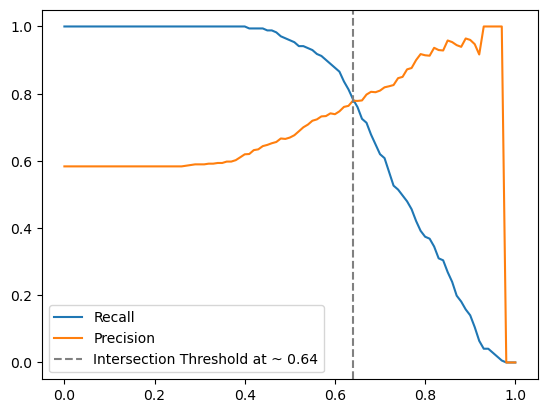

In [48]:
# Plot precision and recall metrics
plt.plot(df_scores['threshold'], df_scores['recall'],  label = 'Recall')
plt.plot(df_scores['threshold'], df_scores['precision'],  label = 'Precision')

plt.axvline(
    x=intersection['threshold'],
    color="gray",
    linestyle="--",
    label=f"Intersection Threshold at ~ {intersection['threshold']:.2f}",
)

plt.legend();

### Question 4: F1 score

Precision and recall are conflicting — when one grows, the other goes down.  
That's why they are often combined into the **F1 score** — a metric that takes into account both.

This is the formula for computing F1:

$$
F_1 = 2 \cdot \frac{P \cdot R}{P + R}
$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01.

**Question:**  
At which threshold F1 is maximal?

    - 0.14  
    - 0.34  
    - 0.54  
    - 0.74
